# Multi-LM

## Dimension : $ Y(n * 1) = X(n * p) * \beta(p * 1) + \epsilon(n * 1) $

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

### Housing price with multiple fields

In [5]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [6]:
df['intercept'] = 1

In [ ]:
lm = sm.OLS(df['price'], df[['intercept', 'area']])
result_area = lm.fit()
result_area.summary()

In [ ]:
lm = sm.OLS(df['price'], df[['intercept', 'bathrooms']])
result_bath = lm.fit()
result_bath.summary()

In [ ]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms']])
result_bed = lm.fit()
result_bed.summary()

##  > If you sum the R-squared values from each of the three simple linear regression models together...

The sum of the $R^2$ values is greater than 1, but how is this possible? It turns this is possible, because our explanatory variables are not independent of one another.

In [7]:
# Add all quantitative variables...

lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:18:44   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## > Using a multiple linear regression model shows,
only 'area' as statistically significant.... 

## > When adding all of quant-predictors into a single multiple linear regression model, 
the sum of $R^2$ is less than 1. This might seem strange given what we witnessed with the sum of the individual R-squared values in the previous part.

## > How to estimate the coefficientssss?

$\hat{matrix} = X (X^T X)^{-1}X^T $

$\hat{Y} = \hat{matrix}*Y = X*(X^T X)^{-1}X^T*Y = X \hat{\beta} $

### $\hat{\beta} = (X^T X)^{-1}X^T Y $

### Interpretation of  $ \hat{\beta} $: 
the predicted increase in the response for every one unit increase in the explanatory variable, holding all other variables in the model constant.

In [8]:
X = df[['intercept', 'area', 'bedrooms', 'bathrooms']]
Y = df['price']

In [9]:
np.linalg.inv(np.dot(X.transpose(), X))

array([[  1.21551124e-03,   1.21092065e-07,  -7.55437381e-04,
          6.95040125e-04],
       [  1.21092065e-07,   5.91385018e-10,  -2.75050278e-07,
         -1.67844188e-07],
       [ -7.55437381e-04,  -2.75050278e-07,   1.19077017e-03,
         -1.42878406e-03],
       [  6.95040125e-04,  -1.67844188e-07,  -1.42878406e-03,
          2.30525269e-03]])

In [10]:
np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose())

array([[  4.83136720e-04,  -5.12799581e-05,   4.76597749e-04, ...,
          5.83494357e-04,  -1.41279047e-04,  -7.02914122e-05],
       [ -3.37181745e-07,   3.19252293e-07,  -3.69116536e-07, ...,
          3.00869778e-07,   2.76465669e-08,   2.26404845e-07],
       [ -3.67454731e-04,  -5.39153050e-05,  -3.52602016e-04, ...,
         -2.20207430e-04,   5.25711033e-04,  -1.07324113e-05],
       [  8.19794426e-04,  -1.22590899e-04,   8.28858012e-04, ...,
         -1.12062784e-04,  -7.90597044e-04,  -9.62393611e-05]])

In [11]:
#Here comes the coefficientssssss !! the slopes ! 
np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), Y)

array([ 10072.10704672,    345.91101884,  -2925.80632467,   7345.3917137 ])

## Add categorical predictors

In [ ]:
# but what about categorical predictors - neighborhood , style ?  We cannot directly add a categorical variable into your model. 
# We encode the each dummy predictors then drop one of the dummy columns 
#in order to make your matrices full rank(to make (X^T X) invertible) - all of the columns of X must be linearly independent.

In [13]:
neighborhood_dummies = pd.get_dummies(df['neighborhood']); #neighborhood_dummies

In [14]:
df_new = df.join(neighborhood_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0.0,1.0,0.0
1,491,B,3512,5,3,victorian,1744259,1,0.0,1.0,0.0
2,5952,B,1134,3,2,ranch,571669,1,0.0,1.0,0.0
3,3525,A,1940,4,2,ranch,493675,1,1.0,0.0,0.0
4,5108,B,2208,6,4,victorian,1101539,1,0.0,1.0,0.0


In [15]:
df_new['intercept'] = 1
lm2 = sm.OLS(df_new['price'], df_new[['intercept', 'B', 'C']])
results = lm2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:43:15   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

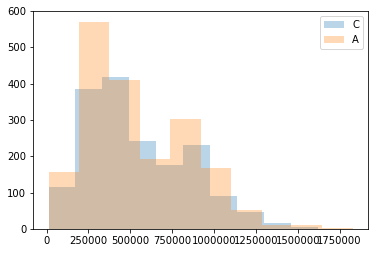

In [16]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

In [17]:
type_dummies = pd.get_dummies(df['style'])
df_new = df_new.join(type_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0.0,1.0,0.0,0.0,1.0,0.0
1,491,B,3512,5,3,victorian,1744259,1,0.0,1.0,0.0,0.0,0.0,1.0
2,5952,B,1134,3,2,ranch,571669,1,0.0,1.0,0.0,0.0,1.0,0.0
3,3525,A,1940,4,2,ranch,493675,1,1.0,0.0,0.0,0.0,1.0,0.0
4,5108,B,2208,6,4,victorian,1101539,1,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
lm3 = sm.OLS(df_new['price'], df_new[['intercept', 'B', 'C', 'lodge', 'victorian', 'bedrooms', 'bathrooms']])
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:51:40   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""